In [1]:
%run ./Binance_keys.ipynb
from binance import Client
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
client = Client(api_key, secret_key)

In [2]:
def getdata(symbol, minute='15m', hoursBack='168'):
    frame = pd.DataFrame(client.get_historical_klines(symbol, minute, hoursBack + ' hours ago UTC'))
    frame = frame[[0,4]]
    frame.columns = ['time', 'close']
    frame
    return frame

In [3]:
def volregimeCalc(df, fast=50, slow=200):
    df['close'] = pd.to_numeric(df['close'], downcast = 'float', errors='coerce')
    df['priceDeltaABS'] = df['close'].diff().abs()
    df['fastMAPD'] = df.priceDeltaABS.rolling(fast).mean()
    df['slowMAPD'] = df.priceDeltaABS.rolling(slow).mean()
    df['deltaMAPD'] = df.fastMAPD - df.slowMAPD
    df['volatile'] = df.deltaMAPD >= 0
    df['calm'] = df.deltaMAPD < 0
    df

In [4]:
def plotVolRegime(symbol = 'BTCUSDT', minute = '15m', hours='168', fast = 50, slow = 200):
    symboldata = getdata(symbol, minute, hours)
    volregimeCalc(symboldata, fast, slow)
    symboldataclean = symboldata.dropna()
    df = symboldataclean
    plt.figure(figsize = (12,5))
    plt.plot(df['time'], df['close'])
    plt.fill_between(df['time'], min(df['close']), max(df['close']), where=df['volatile'], alpha = 0.1)
    plt.title(f'{symbol} regime detection - {minute} candles, {hours} hours of data using MAPD lengths: {fast}, {slow}')
    plt.xlabel('time')
    plt.ylabel('price')

In [5]:
def plotMAPD(symbol = 'BTCUSDT', minute = '15m', hours='168', fast = 50, slow = 200):
    symboldata = getdata(symbol, minute, hours)
    volregimeCalc(symboldata, fast, slow)
    symboldataclean = symboldata.dropna()
    df = symboldataclean
    plt.figure(figsize = (12,5))
    plt.plot(df['time'], df['fastMAPD'])
    plt.plot(df['time'], df['slowMAPD'])
    plt.title(f'{symbol} price change moving averages: {fast} {slow} on {minute} minute data for {hours} hours')
    plt.xlabel('time')
    plt.ylabel('price change moving averages')

In [6]:
def plotdeltaMAPD(symbol = 'BTCUSDT', minute = '15m', hours='168', fast = 50, slow = 200):
    symboldata = getdata(symbol, minute, hours)
    volregimeCalc(symboldata, fast, slow)
    symboldataclean = symboldata.dropna()
    df = symboldataclean
    plt.figure(figsize = (12,5))
    plt.plot(df['time'], df['deltaMAPD'])
    plt.title(f'{symbol} delta of price change moving averages: {fast} {slow} on {minute} minute data for {hours} hours')
    plt.xlabel('time')
    plt.ylabel('price change moving averages')

In [7]:
def plotdeltaMAPDwMSTD(symbol = 'BTCUSDT', minute = '15m', hours='168', fast = 50, slow = 200):
    symboldata = getdata(symbol, minute, hours)
    volregimeCalc(symboldata, fast, slow)
    symboldataclean = symboldata.dropna()
    df = symboldataclean
    mean = list((df['deltaMAPD'].mean() for i in range(len(df['time']))))
    std = list((df['deltaMAPD'].std() for i in range(len(df['time']))))
    plt.figure(figsize = (12,5))
    dms = pd.DataFrame({
    'data': df['deltaMAPD'],
    'mean' : mean,
    'std' : std,
    'negstd' : np.array(std) * -1
    })
    dms.plot()
    plt.title(f'{symbol} delta of price change moving averages: {fast} {slow} on {minute} minute data for {hours} hours')
    plt.xlabel('time')
    plt.ylabel('delta of price change moving averages')
    plt.show()

In [8]:
def plotRawPriceDelta(symbol = 'BTCUSDT', minute = '15m', hours='168', fast = 50, slow = 200):
    symboldata = getdata(symbol, minute, hours)
    volregimeCalc(symboldata, fast, slow)
    symboldataclean = symboldata.dropna()
    df = symboldataclean
    plt.figure(figsize = (12,5))
    plt.plot(df['time'], df['priceDeltaABS'])
    plt.title(f'{symbol} raw absolute price change on {minute} minute data for {hours} hours')
    plt.xlabel('time')
    plt.ylabel('raw absolute price change')

In [9]:
def plotRawPrice(symbol = 'BTCUSDT', minute = '15m', hours='168', fast = 50, slow = 200):
    symboldata = getdata(symbol, minute, hours)
    volregimeCalc(symboldata, fast, slow)
    symboldataclean = symboldata.dropna()
    df = symboldataclean
    plt.figure(figsize=(12,5))
    plt.plot(df['time'], df['close'])
    plt.title(f'{symbol} close data on {minute} minute timeframe for {hours} hours')
    plt.xlabel('time')
    plt.ylabel('close')

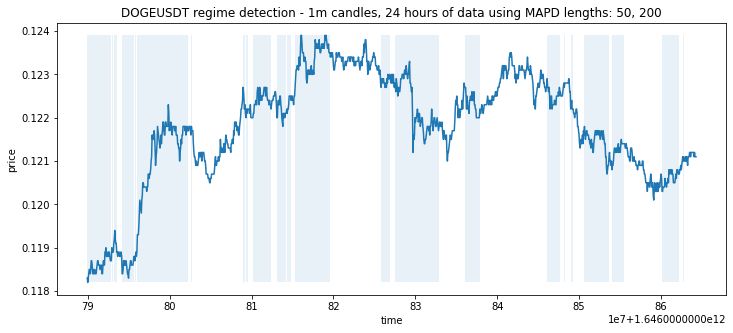

In [10]:
plotVolRegime('DOGEUSDT', '1m', '24', 50, 200)

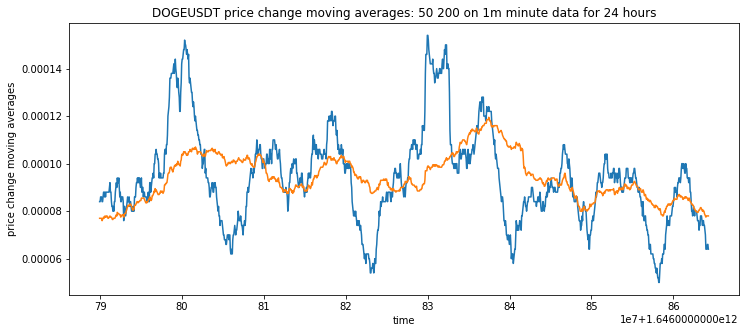

In [11]:
plotMAPD('DOGEUSDT', '1m', '24', 50, 200)